# Exploratory Data Analysis - Part 1

## Import Libraries

In [872]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


## Import Data & Preprocessing

In [873]:
# Benevoles - Mentor

In [874]:
Benevoles_df = pd.read_excel("../shared_data_read_only/Data/Article1/Hackaton_Benevoles_JPMORGAN.xlsx")
Benevoles_df.head()

,mentor_id,registration_date,workfield,current_role,needs_to_address
0,63549,2024-09-04 15:35:14,Consulting-Audit,Junior Consultant Public Sector - Health,"to apply, perform, motivate, discover, english"
1,63599,2024-09-09 15:23:01,Animals,Head of Regulatory Affairs in Europe,"to apply, perform, motivate, discover, english"
2,63515,2024-09-04 09:45:39,Teaching-education,Educational engineer,"to apply, perform, motivate, discover, english"
3,63882,2024-10-04 16:06:14,Computer science,Project Manager,"to apply, perform, motivate, discover"
4,63635,2024-09-11 16:20:37,Human Resources,Senior Recruitment Consultant,"to apply, perform, motivate, english, discover"


In [875]:
#Jeunes - Mentee
Jeunes_df = pd.read_excel("../shared_data_read_only/Data/Article1/Hackaton_Jeunes_JPMORGAN.xlsx")
Jeunes_df['registration_date'] = pd.to_datetime(Jeunes_df['registration_date'], errors='coerce')
Jeunes_df['registration_year_month'] = (
    pd.to_datetime(Jeunes_df['registration_date'], errors='coerce')
    .dt.strftime('%Y_%m')
)

Jeunes_df.head()

,mentee_id,field_of_study,study_level,degree,needs,average_grade,program,engagement_score,registration_date,desired_exchange_frequency,hobby,project_confidence_level,project_development_level,Unnamed: 13,Unnamed: 14,registration_year_month
0,190789,"Commerce, Management, Economics, Management",Bac+1,BTS,[pro],10 and 12,PP,1,2024-08-01 10:42:11,Once per month,NaN,NaN,NaN,NaN,NaN,2024_08
1,190790,Other,Bac+5 and plus,Master,[pro],Not specified (or Not provided),PNP,-1,2024-08-01 10:59:37,Not specified (or Not provided),NaN,NaN,NaN,NaN,NaN,2024_08
2,190791,"Commerce, Management, Economics, Management",Bac+2,BTS,[pro],10 and 12,PP,1,2024-08-01 11:53:17,More than once per week,football,NaN,NaN,NaN,soccer,2024_08
3,190792,Other,Bac+1,Licence,[pro],Not specified (or Not provided),PNP,0,2024-08-01 12:03:17,Not specified (or Not provided),NaN,NaN,NaN,NaN,NaN,2024_08
4,190793,"IT, IS, Data, Web, Tech",Bac+5 and plus,Grande école,[pro],Not specified (or Not provided),PNP,6,2024-08-01 12:49:51,More than once per week,basketball,NaN,NaN,NaN,NaN,2024_08


In [876]:
#Binomes - Mentor and Mentee
Binomes_df = pd.read_excel("../shared_data_read_only/Data/Article1/Hackaton_Binomes_JPMORGAN.xlsx")
Binomes_df['binome_date_proposition'] = pd.to_datetime(Binomes_df['binome_date_proposition'], errors='coerce')
Binomes_df['binome_date_creation'] = pd.to_datetime(Binomes_df['binome_date_creation'], errors='coerce')
Binomes_df['binome_date_update_statut'] = pd.to_datetime(Binomes_df['binome_date_update_statut'], errors='coerce')

Binomes_df.head()


,binome_id,binome_statut,binome_date_proposition,binome_date_creation,binome_acceptance_delay,binome_date_update_statut,binome_cancellation_reason,binome_score,mentee_id,mentor_id
0,157654,COMPLETED,2024-08-01 09:34:37,2024-08-01 14:21:25,286,2024-10-01 16:46:58,NaN,7,181634,62709
1,157655,REJECTED,2024-08-01 14:31:39,NaT,0,2024-08-03 15:00:00,NaN,8,149362,24422
2,157656,REJECTED,2024-08-01 14:50:38,NaT,0,2024-08-03 15:00:00,NaN,8,190489,31188
3,157657,REJECTED,2024-08-01 14:54:30,NaT,0,2024-08-03 15:00:00,NaN,7,190364,63387
4,157658,CANCELLED,2024-08-01 14:55:46,2024-08-01 15:55:58,60,2024-11-26 16:09:12,No response from either party,9,190371,63283


## Data Overview

In [877]:
Benevoles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8398 entries, 0 to 8397
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   mentor_id          8398 non-null   int64         
 1   registration_date  8398 non-null   datetime64[ns]
 2   workfield          7582 non-null   object        
 3   current_role       1123 non-null   object        
 4   needs_to_address   529 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.2+ KB


In [878]:
Benevoles_df.describe()

,mentor_id,registration_date
count,8398.000000,8398
mean,67585.500000,2025-01-18 22:39:22.234103296
min,63387.000000,2024-08-01 00:41:51
25%,65486.250000,2024-12-10 22:40:58.249999872
50%,67585.500000,2025-01-21 20:28:37.500000
75%,69684.750000,2025-02-25 20:49:22.500000
max,71784.000000,2025-07-30 17:28:30
std,2424.438114,NaN


In [879]:
Jeunes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51914 entries, 0 to 51913
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   mentee_id                   51914 non-null  int64         
 1   field_of_study              51914 non-null  object        
 2   study_level                 51914 non-null  object        
 3   degree                      51914 non-null  object        
 4   needs                       51914 non-null  object        
 5   average_grade               51914 non-null  object        
 6   program                     51914 non-null  object        
 7   engagement_score            51914 non-null  int64         
 8   registration_date           51914 non-null  datetime64[ns]
 9   desired_exchange_frequency  51914 non-null  object        
 10  hobby                       6586 non-null   object        
 11  project_confidence_level    37494 non-null  float64   

In [880]:
Jeunes_df.describe()

,mentee_id,engagement_score,registration_date,project_confidence_level,project_development_level,Unnamed: 13
count,51914.000000,51914.000000,51914,37494.000000,39272.000000,0.0
mean,213359.663231,0.088589,2025-01-05 15:30:48.078919424,3.492292,2.961856,NaN
min,190789.000000,-7.000000,2024-08-01 10:42:11,1.000000,1.000000,NaN
25%,201920.250000,-2.000000,2024-11-11 13:33:10.249999872,3.000000,2.000000,NaN
50%,213378.500000,0.000000,2025-01-09 11:41:19,3.000000,3.000000,NaN
75%,224701.750000,2.000000,2025-02-22 19:19:05,4.000000,4.000000,NaN
max,236103.000000,15.000000,2025-07-30 22:53:29,5.000000,5.000000,NaN
std,13130.145611,3.155581,NaN,1.128494,1.136222,NaN


In [881]:
Binomes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44468 entries, 0 to 44467
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   binome_id                   44468 non-null  int64         
 1   binome_statut               44468 non-null  object        
 2   binome_date_proposition     44468 non-null  datetime64[ns]
 3   binome_date_creation        23198 non-null  datetime64[ns]
 4   binome_acceptance_delay     44468 non-null  int64         
 5   binome_date_update_statut   44468 non-null  datetime64[ns]
 6   binome_cancellation_reason  9011 non-null   object        
 7   binome_score                44468 non-null  object        
 8   mentee_id                   44468 non-null  int64         
 9   mentor_id                   44468 non-null  int64         
dtypes: datetime64[ns](3), int64(4), object(3)
memory usage: 3.4+ MB


In [882]:
Binomes_df.describe()

,binome_id,binome_date_proposition,binome_date_creation,binome_acceptance_delay,binome_date_update_statut,mentee_id,mentor_id
count,44468.000000,44468,23198,44468.000000,44468,44468.000000,44468.000000
mean,178839.430287,2025-01-19 12:42:00.279122176,2025-01-16 10:40:09.288387072,174.124359,2025-03-14 02:24:03.337118976,204875.413016,48601.231717
min,157654.000000,2024-08-01 09:34:37,2024-08-01 14:21:25,-21594.000000,2024-08-03 15:00:00,97.000000,86.000000
25%,168137.750000,2024-11-26 10:50:39.500000,2024-11-19 10:24:21.249999872,0.000000,2025-01-10 09:41:05.249999872,197799.500000,33329.750000
50%,178787.500000,2025-01-24 14:19:27.500000,2025-01-17 15:53:54.500000,0.000000,2025-02-27 14:17:55,210471.000000,57005.000000
75%,189479.250000,2025-03-10 16:16:59.500000,2025-03-11 15:24:25.500000,51.000000,2025-05-07 09:21:39.500000,223304.250000,65799.000000
max,200213.000000,2025-07-30 14:07:27,2025-07-31 18:02:14,2932.000000,2025-10-09 12:00:02,236083.000000,71755.000000
std,12294.049118,NaN,NaN,477.487733,NaN,32459.364979,20855.078386


## EDA

### Top 30 Workfield of Mentors

In [883]:
count_workfield = Benevoles_df.groupby("workfield")['mentor_id'].count().sort_values(ascending=False)
print("Top 30 workfield of mentors:")
count_workfield.head(30)

Top 30 workfield of mentors:


workfield
Computer science                             583
Trade, distribution                          492
Teaching-education                           488
Consulting-Audit                             409
Banking-Finance                              392
Coaching, personal development support       355
Human Resources                              248
Industry                                     233
Construction, Building, Civil Engineering    228
Communication                                228
Other                                        202
Law and justice                              198
Management, Management                       194
Aeronautics, Aerospace                       187
Marketing-advertising                        170
Agri-food                                    159
Medical                                      151
Insurance                                    148
Accounting, management                       143
Entrepreneurship and business creation       127
New techno

### Number of Rejections Per Month

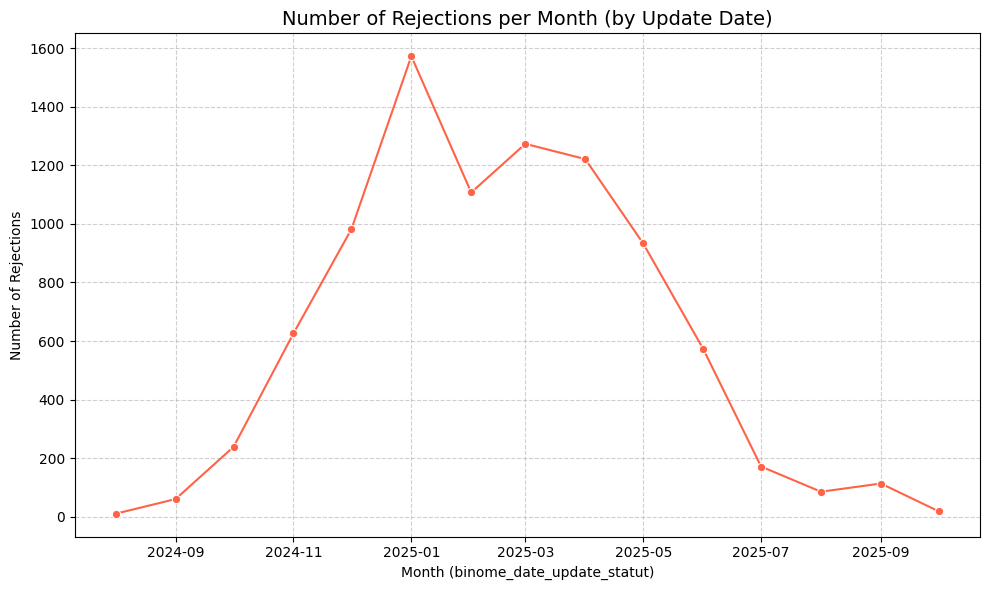

In [884]:
rejected_df = df[df['binome_statut'].isin(['REJECTED', 'CANCELLED'])].copy()

# Extract year-month from the update date
rejected_df['update_month'] = rejected_df['binome_date_update_statut'].dt.to_period('M')

# Count rejections per month
rejection_trend = (
    rejected_df.groupby('update_month')['binome_id']
    .count()
    .reset_index(name='num_rejections')
    .sort_values('update_month')
)

# Convert Period to Timestamp for plotting
rejection_trend['update_month'] = rejection_trend['update_month'].dt.to_timestamp()

plt.figure(figsize=(10,6))
sns.lineplot(
    data=rejection_trend,
    x='update_month',
    y='num_rejections',
    marker='o',
    color='tomato'
)
plt.title("Number of Rejections per Month (by Update Date)", fontsize=14)
plt.xlabel("Month (binome_date_update_statut)")
plt.ylabel("Number of Rejections")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Top cancellation reasons

In [885]:
print("Reasons type count: ", Binomes_df["binome_cancellation_reason"].nunique())
cancel_reason_df = (
    Binomes_df
    .groupby("binome_cancellation_reason")['mentee_id']
    .count()
    .reset_index(name='num_cancellations')   #count result to new cols
    .sort_values(by='num_cancellations', ascending=False)
)

total = cancel_reason_df['num_cancellations'].sum()

cancel_reason_df['percentage'] = (
    cancel_reason_df['num_cancellations'] / total * 100
).round(2)  # Round to 2 digit


pd.set_option('display.max_colwidth', None)

cancel_reason_df.head(17)


Reasons type count:  17


,binome_cancellation_reason,num_cancellations,percentage
8,No response from the mentee,2384,26.46
7,No response from either party,2053,22.78
9,No response from the mentor,1297,14.39
6,Mentor's unavailability,1130,12.54
5,Mentor profile not suitable / Poor matching (or Bad Match),690,7.66
0,Bad timing / Support no longer necessary (or Mentoring no longer required),302,3.35
16,mentee's unavailability (or Mentee is unavailable),300,3.33
10,Other,298,3.31
2,Lack of motivation from the mentee,261,2.90
15,The mentee no longer requires mentoring,230,2.55


In [886]:
# Cancellation Reasons vs Delay

In [887]:
# Reason vs Delay

df = Binomes_df.dropna(subset=['binome_cancellation_reason', 'binome_acceptance_delay'])

delay_summary = df.groupby('binome_cancellation_reason')['binome_acceptance_delay'].describe()

delay_summary


,count,mean,std,min,25%,50%,75%,max
binome_cancellation_reason,,,,,,,,
Bad timing / Support no longer necessary (or Mentoring no longer required),302.0,354.579470,670.294529,0.0,1.00,23.5,222.25,2849.0
Disagreement between mentor/mentee (or Mentor/Mentee Conflict),23.0,213.043478,265.887618,1.0,6.00,44.0,452.00,630.0
Lack of motivation from the mentee,261.0,335.406130,611.824997,0.0,3.00,39.0,275.00,2660.0
"Matching bug and/or platform issue (e.g., mentor already paired, email address problem, etc.)",9.0,6.111111,12.353587,0.0,0.00,0.0,1.00,34.0
Mentor dissatisfied with our program / processes,10.0,336.100000,522.266950,2.0,7.00,145.0,353.50,1686.0
Mentor profile not suitable / Poor matching (or Bad Match),690.0,197.855072,498.174391,0.0,0.00,1.0,67.75,2728.0
Mentor's unavailability,1130.0,337.826549,596.086443,0.0,3.00,42.5,333.00,2897.0
No response from either party,2053.0,343.683877,598.240016,0.0,5.00,54.0,337.00,2908.0
No response from the mentee,2384.0,375.418205,639.810551,0.0,3.00,46.0,380.00,2915.0


/tmp/ipykernel_56229/3675266169.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_56229/3675266169.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


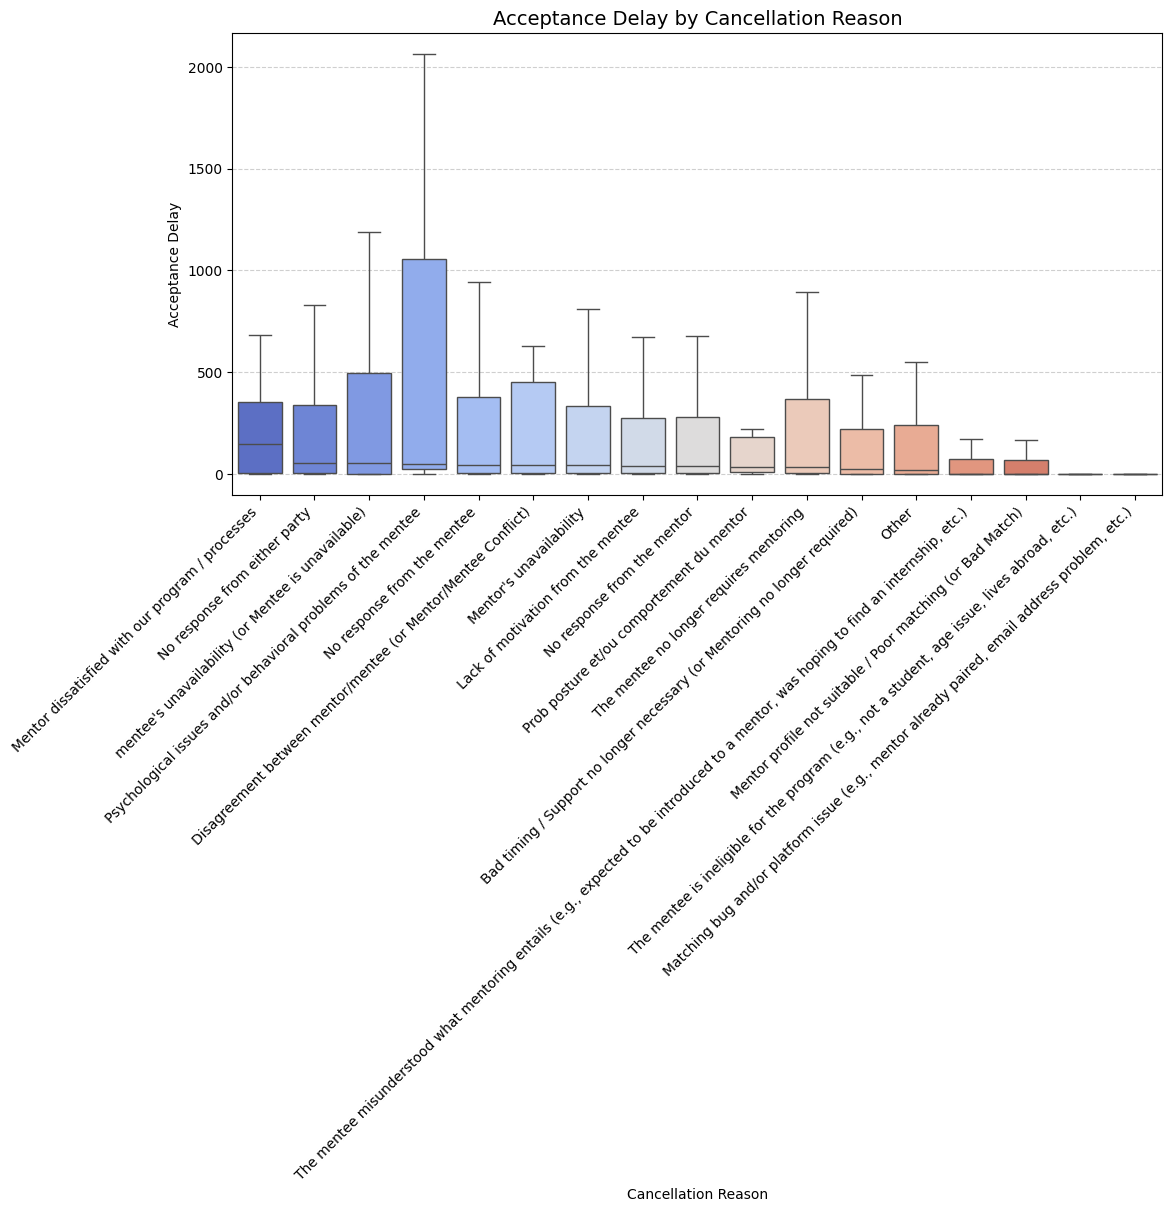

In [888]:
# Reason vs Delay
# Filter rows with valid data
df = Binomes_df.dropna(subset=['binome_cancellation_reason', 'binome_acceptance_delay'])

# Sort reasons by median delay for a clearer order
order = (
    df.groupby('binome_cancellation_reason')['binome_acceptance_delay']
    .median()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='binome_cancellation_reason',
    y='binome_acceptance_delay',
    order=order,
    palette='coolwarm',
    showfliers=False
)

plt.title("Acceptance Delay by Cancellation Reason", fontsize=14)
plt.xlabel("Cancellation Reason")
plt.ylabel("Acceptance Delay")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Counts of needs

In [889]:
Jeunes_df["needs"].unique()
#We have 5 different values in needs columns
Jeunes_df.groupby("needs")['mentee_id'].count().sort_values(ascending=False) 

needs
[pro]          27746
[study]        24143
[pro,study]       13
[]                10
[study,pro]        2
Name: mentee_id, dtype: int64

### Daily Registration Trend

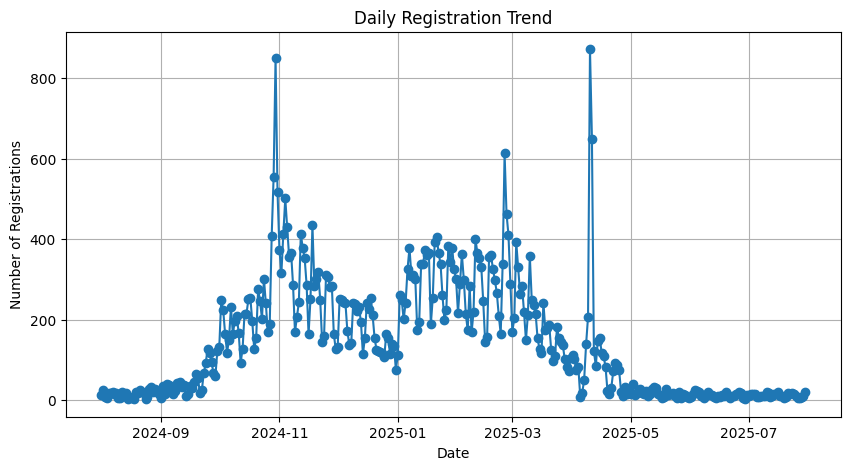

In [890]:
Jeunes_df['registration_date'] = pd.to_datetime(Jeunes_df['registration_date'], errors='coerce')
daily_counts = Jeunes_df['registration_date'].dt.date.value_counts().sort_index()

daily_counts = (
    Jeunes_df.groupby(Jeunes_df['registration_date'].dt.date)
    .size()
    .reset_index(name='num_registrations')
)



plt.figure(figsize=(10,5))
plt.plot(daily_counts['registration_date'], daily_counts['num_registrations'], marker='o')
plt.title("Daily Registration Trend")
plt.xlabel("Date")
plt.ylabel("Number of Registrations")
plt.grid(True)
plt.show()


### Monthly Registration Trend

In [891]:
monthly_counts = (
    Jeunes_df.groupby(Jeunes_df['registration_year_month'])
    .size()
    .reset_index(name='num_registrations')
)

monthly_counts.sort_values(by="num_registrations")

,registration_year_month,num_registrations
11,2025_07,361
10,2025_06,374
0,2024_08,473
9,2025_05,520
1,2024_09,1427
8,2025_04,3632
4,2024_12,5416
7,2025_03,5761
2,2024_10,7585
6,2025_02,8310


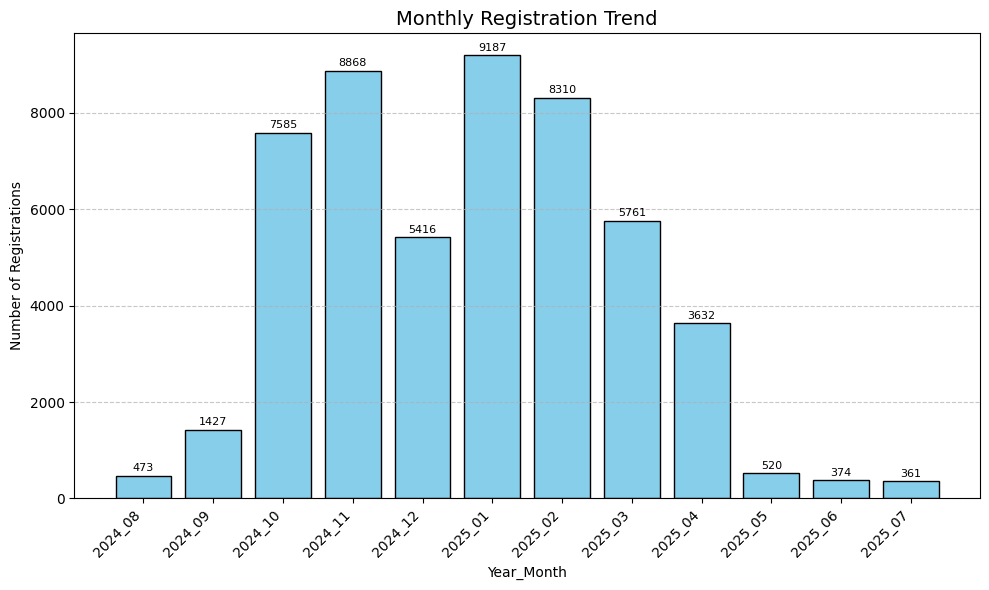

In [892]:


monthly_counts_plot = monthly_counts.sort_values(by='registration_year_month').tail(25)

plt.figure(figsize=(10,6))
bars = plt.bar(
    monthly_counts_plot['registration_year_month'],
    monthly_counts_plot['num_registrations'],
    color='skyblue',
    edgecolor='black'
)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # x position (middle of bar)
        height + 50,                         # y position (slightly above)
        f"{int(height)}",                    # label text
        ha='center', va='bottom', fontsize=8
    )

plt.title("Monthly Registration Trend", fontsize=14)
plt.xlabel("Year_Month")
plt.ylabel("Number of Registrations")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Engagement Score

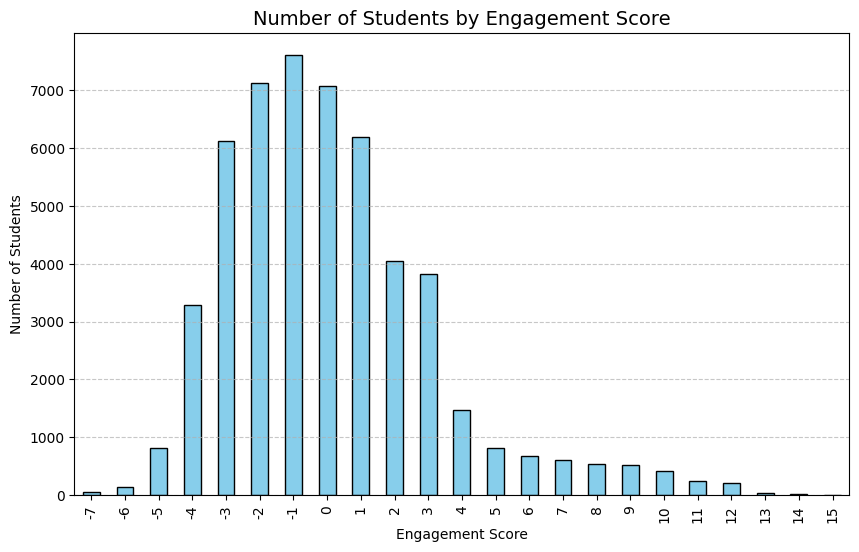

In [860]:
engagement_counts = Jeunes_df.groupby("engagement_score")['mentee_id'].count().sort_index() 

# Plot
plt.figure(figsize=(10,6))
engagement_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Students by Engagement Score", fontsize=14)
plt.xlabel("Engagement Score")
plt.ylabel("Number of Students")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Degree

In [861]:
Jeunes_df["degree"].unique()

array(['BTS', 'Master', 'Licence', 'Grande école', 'Autre',
       'Ecole Post-bac', 'BUT/DUT', 'CPGE', 'Doctorat'], dtype=object)

### Program

In [826]:
Jeunes_df["program"].unique() 
#scholarship based on  income (lower socialeconomic), address)
# PP: lower
# PNP: medium - upper
# EL: lower as well but aiming for longer study (years expected to study, such as master's, PhD, etc.)

array(['PP', 'PNP', 'EL'], dtype=object)

### Exchange Frequency

In [862]:
Jeunes_df["desired_exchange_frequency"].unique()

array(['Once per month', 'Not specified (or Not provided)',
       'More than once per week', 'Once every two weeks (or Bi-weekly)',
       'Once per week'], dtype=object)

### Hobby

In [863]:
Jeunes_df["hobby"].unique()

array([nan, 'football', 'basketball', 'movie theater', 'martial', 'art',
       'handball', 'running', 'metal', 'beach', 'dance', 'video games',
       'novel', 'writing', 'cities', 'creation', 'singing', 'manga',
       'boxing', 'ski', 'muscle', 'cook', 'surf', 'bike', 'biography',
       'photo', 'athlete', 'philosophy', 'afro', 'meditation', 'tennis',
       'hike', 'backpacker', 'concerts', 'volleyball', 'skateboard',
       'makeup', 'animals', 'variety', 'campaign', 'games', 'rock', 'rap',
       'pastry shop', 'poetry', 'rugby', 'swimming', 'theater', 'blues',
       'pop', 'comics', 'hip hop', 'gym', 'thriller', 'winter', 'jazz',
       'videos', 'gardening', 'escalation ', 'randb', 'electro',
       'science fiction', 'camping', 'spoke', 'yoga', 'classic', 'Latin',
       'reggae', 'house', 'indie', 'snow', 'drunk', 'fishing', 'punk',
       'funk', 'petanque', 'ping-pong'], dtype=object)

### Project Confidence Level

In [864]:
Jeunes_df["project_confidence_level"].unique()
Jeunes_df.groupby("project_confidence_level")["mentee_id"].count()

project_confidence_level
1.0     1637
2.0     4959
3.0    13525
4.0     8055
5.0     9318
Name: mentee_id, dtype: int64

## Membership length plot 

### Relationship between mentorship length and the freq

In [865]:
cancel_data['binome_date_update_statut'] = pd.to_datetime(cancel_data['binome_date_update_statut'], errors='coerce')
cancel_data['binome_date_creation'] = pd.to_datetime(cancel_data['binome_date_creation'], errors='coerce')
cancel_data['days_diff'] = (cancel_data['binome_date_update_statut'] - cancel_data['binome_date_creation']).dt.days
cancel_data


,binome_id,binome_statut,binome_date_proposition,binome_date_creation,binome_acceptance_delay,binome_date_update_statut,binome_cancellation_reason,binome_score,mentee_id,mentor_id,days_diff,start_month
4,157658,CANCELLED,2024-08-01 14:55:46,2024-08-01 15:55:58,60,2024-11-26 16:09:12,No response from either party,9,190371,63283,117.0,2024-08
6,157660,CANCELLED,2024-08-01 14:59:56,2024-08-01 15:02:31,2,2025-06-04 14:11:47,NaN,3,190400,20829,306.0,2024-08
9,157663,CANCELLED,2024-08-01 15:09:06,2024-08-01 15:17:37,8,2024-08-06 11:07:51,Mentor's unavailability,9,190288,3747,4.0,2024-08
11,157665,CANCELLED,2024-08-01 15:13:05,2024-08-01 15:42:25,29,2024-09-09 12:02:27,No response from the mentee,9,190313,59938,38.0,2024-08
12,157666,CANCELLED,2024-08-01 15:14:48,2024-08-01 16:01:01,46,2024-09-13 14:29:44,No response from the mentee,7,190731,34855,42.0,2024-08
...,...,...,...,...,...,...,...,...,...,...,...,...
44427,200175,CANCELLED,2025-07-24 10:52:36,2025-07-24 10:57:29,4,2025-08-26 11:15:06,NaN,5,228166,64617,33.0,2025-07
44434,200182,CANCELLED,2025-07-24 12:44:12,2025-07-24 23:17:06,632,2025-08-22 13:51:40,No response from the mentor,0,201762,71700,28.0,2025-07
44435,200183,CANCELLED,2025-07-24 14:41:50,2025-07-24 22:15:21,453,2025-08-12 10:05:44,NaN,7,235485,45057,18.0,2025-07
44451,200198,CANCELLED,2025-07-29 10:56:40,2025-07-29 11:26:28,29,2025-09-23 17:28:33,The mentee no longer requires mentoring,7,236039,54005,56.0,2025-07


### Histogram (Distribution of days until cancellation)

Overall mean mentorship duration before cancellation: 49.12 days


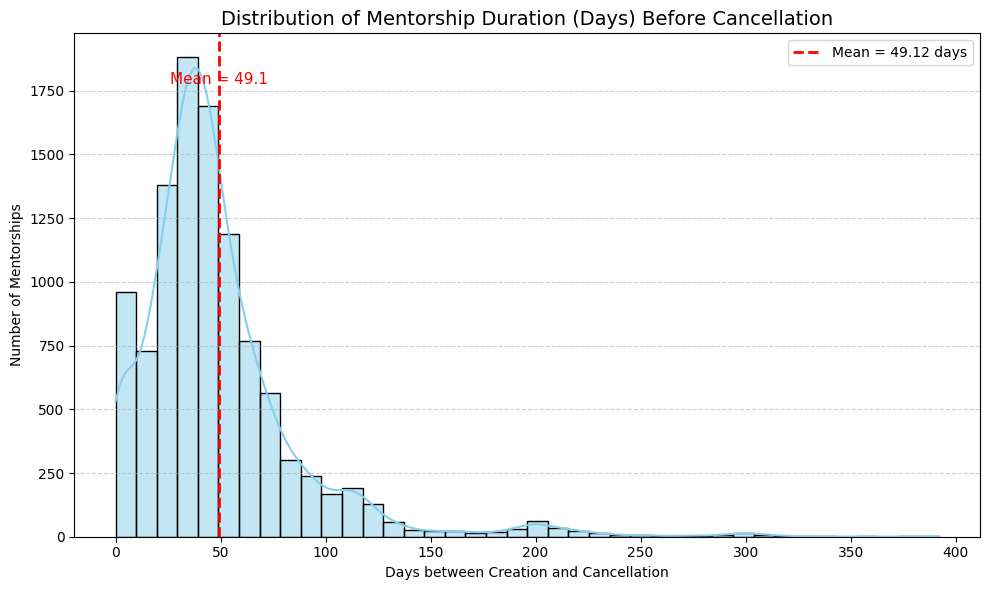

In [866]:
# Global average from all cancellations
global_mean = cancel_data['days_diff'].mean()
print(f"Overall mean mentorship duration before cancellation: {global_mean:.2f} days")

# Plot
plt.figure(figsize=(10,6))
sns.histplot(cancel_data['days_diff'], bins=40, kde=True, color='skyblue', edgecolor='black')

# Add vertical mean line using global_mean and twxt
plt.axvline(global_mean, color='red', linestyle='--', linewidth=2, label=f"Mean = {global_mean:.2f} days")
plt.text(global_mean, plt.ylim()[1]*0.9, f"Mean = {global_mean:.1f}", color='red', fontsize=11, ha='center')

plt.title("Distribution of Mentorship Duration (Days) Before Cancellation", fontsize=14)
plt.xlabel("Days between Creation and Cancellation")
plt.ylabel("Number of Mentorships")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Avg days of duration of each desired exchange frequency category

In [867]:
merged_df = pd.merge(
    cancel_data,     # left dataframe
    Jeunes_df,       # right dataframe
    on='mentee_id',  # matching key
    how='left'       # keep ALL mentees in cancel_data only
)
merged_df

,binome_id,binome_statut,binome_date_proposition,binome_date_creation,binome_acceptance_delay,binome_date_update_statut,binome_cancellation_reason,binome_score,mentee_id,mentor_id,...,program,engagement_score,registration_date,desired_exchange_frequency,hobby,project_confidence_level,project_development_level,Unnamed: 13,Unnamed: 14,registration_year_month
0,157658,CANCELLED,2024-08-01 14:55:46,2024-08-01 15:55:58,60,2024-11-26 16:09:12,No response from either party,9,190371,63283,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157660,CANCELLED,2024-08-01 14:59:56,2024-08-01 15:02:31,2,2025-06-04 14:11:47,NaN,3,190400,20829,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157663,CANCELLED,2024-08-01 15:09:06,2024-08-01 15:17:37,8,2024-08-06 11:07:51,Mentor's unavailability,9,190288,3747,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,157665,CANCELLED,2024-08-01 15:13:05,2024-08-01 15:42:25,29,2024-09-09 12:02:27,No response from the mentee,9,190313,59938,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157666,CANCELLED,2024-08-01 15:14:48,2024-08-01 16:01:01,46,2024-09-13 14:29:44,No response from the mentee,7,190731,34855,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15794,200183,CANCELLED,2025-07-24 14:41:50,2025-07-24 22:15:21,453,2025-08-12 10:05:44,NaN,7,235485,45057,...,PNP,8.0,2025-06-03 11:35:02,Not specified (or Not provided),NaN,2.0,4.0,NaN,NaN,2025_06
15795,200183,CANCELLED,2025-07-24 14:41:50,2025-07-24 22:15:21,453,2025-08-12 10:05:44,NaN,7,235485,45057,...,PNP,8.0,2025-06-03 11:35:02,Not specified (or Not provided),NaN,2.0,4.0,NaN,NaN,2025_06
15796,200183,CANCELLED,2025-07-24 14:41:50,2025-07-24 22:15:21,453,2025-08-12 10:05:44,NaN,7,235485,45057,...,PNP,8.0,2025-06-03 11:35:02,Not specified (or Not provided),NaN,2.0,4.0,NaN,NaN,2025_06
15797,200198,CANCELLED,2025-07-29 10:56:40,2025-07-29 11:26:28,29,2025-09-23 17:28:33,The mentee no longer requires mentoring,7,236039,54005,...,PNP,8.0,2025-07-24 12:04:56,Not specified (or Not provided),NaN,2.0,3.0,NaN,NaN,2025_07


In [868]:
plot_df = merged_df.dropna(subset=['days_diff', 'desired_exchange_frequency']).copy()

# Convert to categorical (so x-axis order looks nice)
order = [
    "More than once per week",
    "Once per week",
    "Once every two weeks (or Bi-weekly)",
    "Once per month",
    "Not specified (or Not provided)"
]
plot_df['desired_exchange_frequency'] = pd.Categorical(
    plot_df['desired_exchange_frequency'],
    categories=order,
    ordered=True
)

avg_days = (
    plot_df.groupby('desired_exchange_frequency')['days_diff']
    .mean()
    .reset_index()
    .sort_values('days_diff', ascending=False)
)


/tmp/ipykernel_56229/4241314488.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df.groupby('desired_exchange_frequency')['days_diff']


/tmp/ipykernel_56229/834258999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


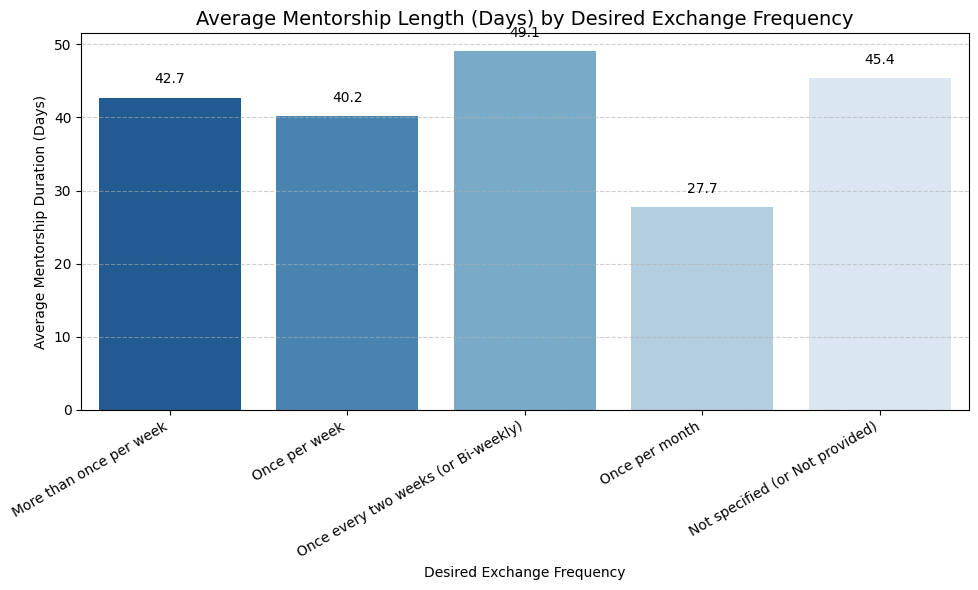

In [869]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_days,
    x='desired_exchange_frequency',
    y='days_diff',
    palette='Blues_r'
)

# Add data labels on top of bars
for index, row in avg_days.iterrows():
    plt.text(index, row['days_diff'] + 2, f"{row['days_diff']:.1f}", ha='center', fontsize=10)

plt.title("Average Mentorship Length (Days) by Desired Exchange Frequency", fontsize=14)
plt.xlabel("Desired Exchange Frequency")
plt.ylabel("Average Mentorship Duration (Days)")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Histogram of each desired exchange frequency

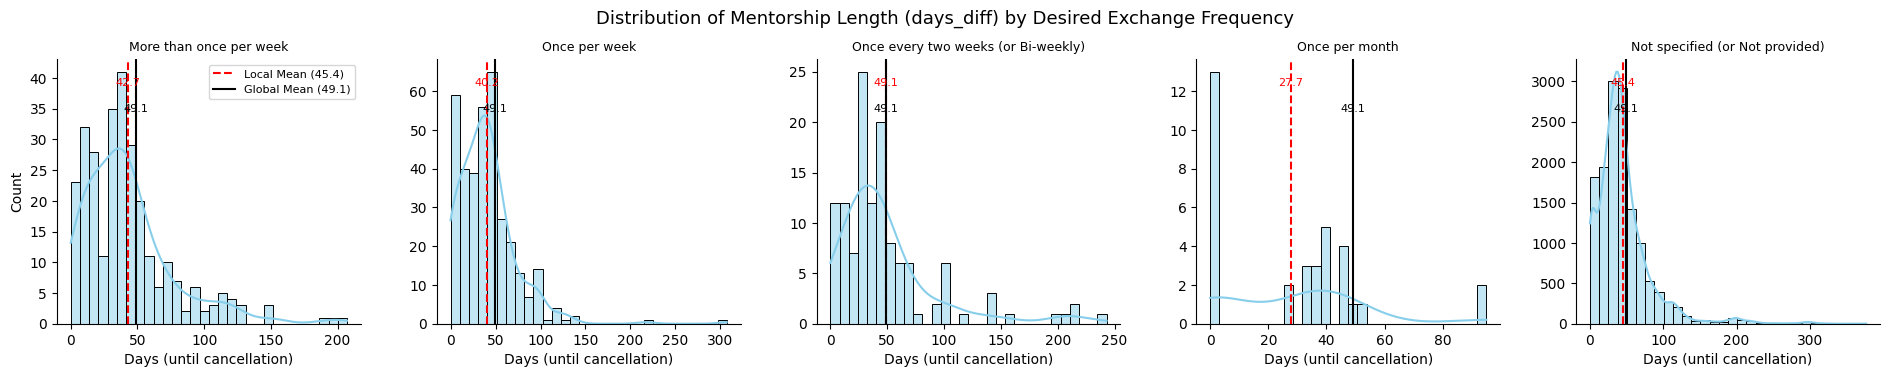

In [870]:
#Prepare data
plot_df = merged_df.dropna(subset=['days_diff', 'desired_exchange_frequency']).copy()
order = [
    "More than once per week",
    "Once per week",
    "Once every two weeks (or Bi-weekly)",
    "Once per month",
    "Not specified (or Not provided)"
]
plot_df['desired_exchange_frequency'] = pd.Categorical(
    plot_df['desired_exchange_frequency'],
    categories=order,
    ordered=True
)

g = sns.FacetGrid(
    plot_df,
    col="desired_exchange_frequency",
    col_wrap=5,
    height=3.8,
    sharex=False,
    sharey=False
)
g.map_dataframe(sns.histplot, x="days_diff", bins=30, color="skyblue", kde=True)

# Add BOTH local and global mean lines
for ax, freq in zip(g.axes.flat, order):
    subset = plot_df[plot_df['desired_exchange_frequency'] == freq]
    if not subset.empty:
        # Local mean (red dashed)
        local_mean = subset['days_diff'].mean()
        ax.axvline(local_mean, color='red', linestyle='--', linewidth=1.5, label=f"Local Mean ({local_mean:.1f})")

        # Global mean (black solid)
        ax.axvline(global_mean, color='black', linestyle='-', linewidth=1.5, label=f"Global Mean ({global_mean:.1f})")
        ax.text(local_mean, ax.get_ylim()[1]*0.9, f"{local_mean:.1f}", color='red', ha='center', fontsize=8)
        ax.text(global_mean, ax.get_ylim()[1]*0.8, f"{global_mean:.1f}", color='black', ha='center', fontsize=8)

# Labels and titles
g.set_titles(col_template="{col_name}", size=9)
g.set_axis_labels("Days (until cancellation)", "Count")
handles, labels = ax.get_legend_handles_labels()
g.axes.flat[0].legend(handles, labels, loc='upper right', fontsize=8)

plt.subplots_adjust(top=0.85, wspace=0.25)
g.fig.suptitle("Distribution of Mentorship Length (days_diff) by Desired Exchange Frequency", fontsize=13)
plt.show()

### Duration (unitl cancelled) by subject

In [871]:
count_df = (
    merged_df.groupby('field_of_study')['mentee_id']
    .count()
    .reset_index(name='num_mentees')
)

avg_days_df = (
    merged_df.groupby('field_of_study')['days_diff']
    .mean()
    .reset_index(name='duration(unitl cancellation)')
)

# merge on 'field_of_study'
summary_df = pd.merge(count_df, avg_days_df, on='field_of_study')
summary_df = summary_df.sort_values('duration(unitl cancellation)', ascending=False).round(2)

summary_df


,field_of_study,num_mentees,duration(unitl cancellation)
15,"Defense, Police, Gendarmerie",7,57.14
14,"Culture, heritage, art history",73,54.38
16,Education,93,51.38
38,Real estate,89,50.75
7,Audio-visual,94,50.20
4,"Agriculture, Natural and Life Sciences",267,48.63
1,"Administrative, Reception",617,47.86
24,"IT, IS, Data, Web, Tech",1144,47.81
3,Agri-food,136,47.55
8,"Banking, Insurance and Finance",911,46.76


### Duration distribution of Top 5 subject

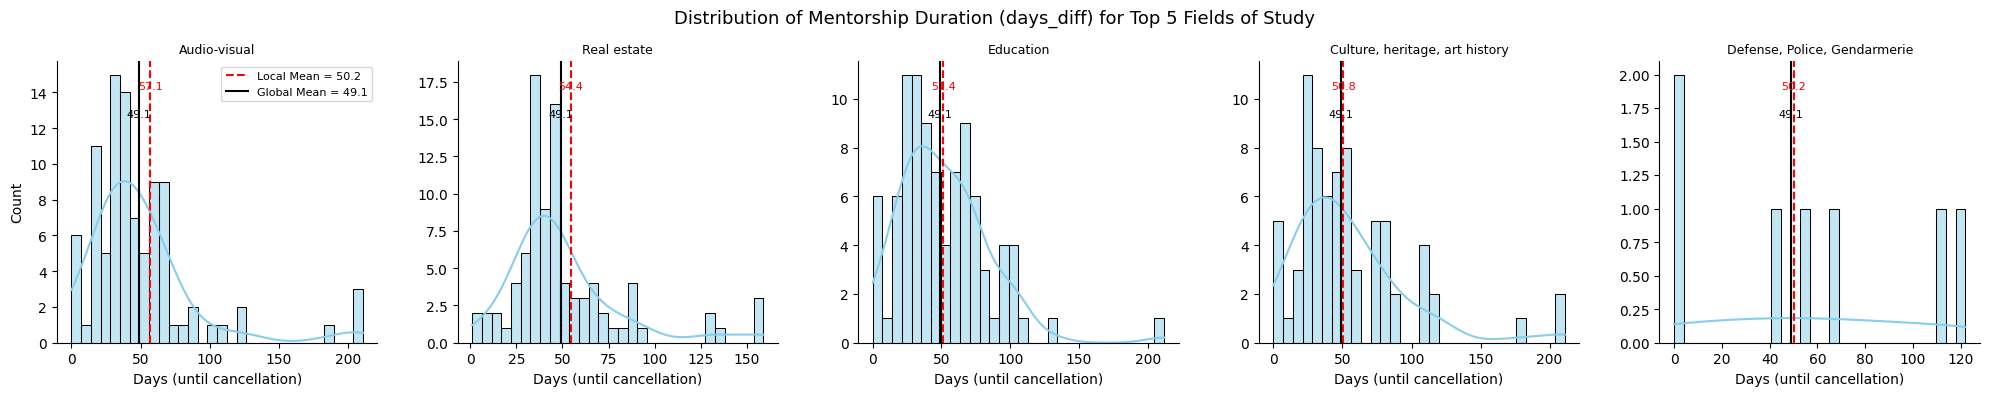

In [837]:
top5_fields = summary_df.sort_values('duration(unitl cancellation)', ascending=False)['field_of_study'].head(5)
top5_df = merged_df[merged_df['field_of_study'].isin(top5_fields)]


# Select top 5 fields based on average duration
top5_fields = summary_df.sort_values('duration(unitl cancellation)', ascending=False)['field_of_study'].head(5)
top5_df = merged_df[merged_df['field_of_study'].isin(top5_fields)]

# Create FacetGrid
g = sns.FacetGrid(
    top5_df,
    col="field_of_study",
    col_wrap=5,
    height=4,
    sharex=False,
    sharey=False
)
g.map_dataframe(sns.histplot, x="days_diff", bins=30, color="skyblue", kde=True)

# Add local + global mean lines
for ax, field in zip(g.axes.flat, top5_fields):
    subset = top5_df[top5_df['field_of_study'] == field]
    if not subset.empty:
        # Local mean (red dashed)
        mean_val = subset['days_diff'].mean()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f"Local Mean = {mean_val:.1f}")

        # Global mean (black solid)
        ax.axvline(global_mean, color='black', linestyle='-', linewidth=1.5, label=f"Global Mean = {global_mean:.1f}")

        # Text labels
        ax.text(mean_val, ax.get_ylim()[1]*0.9, f"{mean_val:.1f}", color='red', ha='center', fontsize=8)
        ax.text(global_mean, ax.get_ylim()[1]*0.8, f"{global_mean:.1f}", color='black', ha='center', fontsize=8)

# Titles and axis labels
g.set_titles(col_template="{col_name}", size=9)
g.set_axis_labels("Days (until cancellation)", "Count")

# Add legend once (only on the first subplot)
handles, labels = ax.get_legend_handles_labels()
g.axes.flat[0].legend(handles, labels, loc='upper right', fontsize=8)

plt.subplots_adjust(top=0.85, wspace=0.25)
g.fig.suptitle("Distribution of Mentorship Duration (days_diff) for Top 5 Fields of Study", fontsize=13)
plt.show()


### Duration distribution of bottom 5 subject

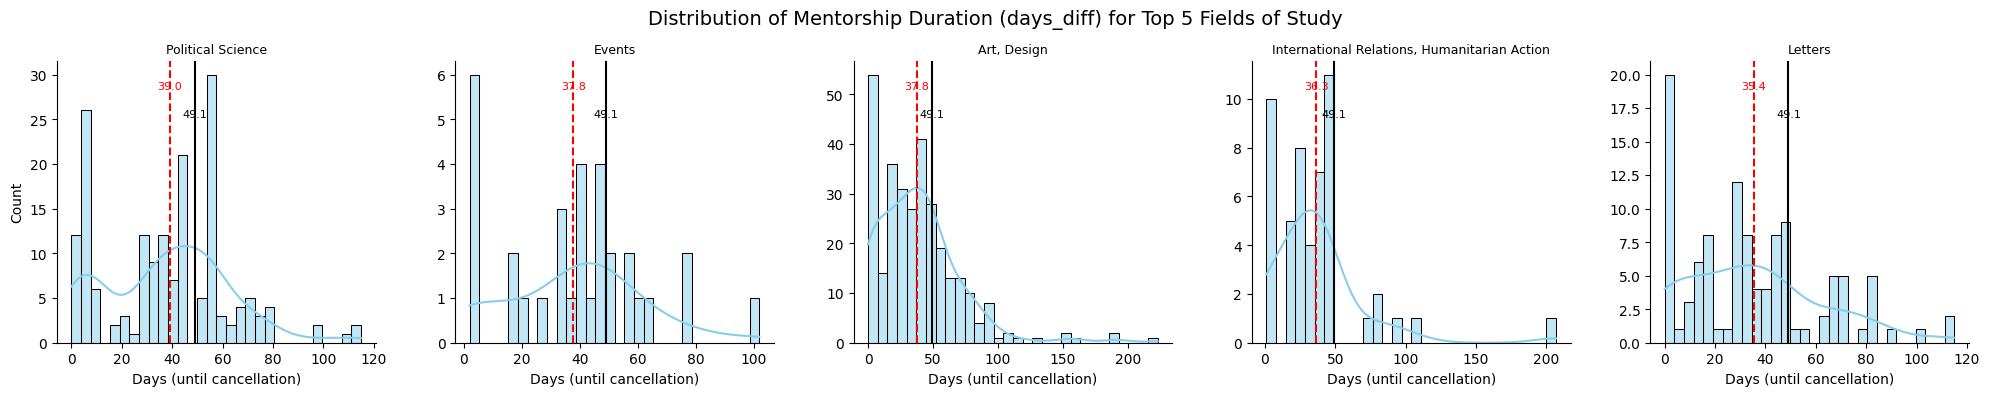

In [838]:
b5_fields = summary_df.sort_values('duration(unitl cancellation)', ascending=False)['field_of_study'].tail(5)
b5_df = merged_df[merged_df['field_of_study'].isin(b5_fields)]


g = sns.FacetGrid(
    b5_df,
    col="field_of_study",
    col_wrap=5,       # 5 plots in a row
    height=4,
    sharex=False,
    sharey=False
)
g.map_dataframe(sns.histplot, x="days_diff", bins=30, color="skyblue", kde=True)

# Add local & global mean lines
for ax, field in zip(g.axes.flat, b5_fields):
    subset = b5_df[b5_df['field_of_study'] == field]
    if not subset.empty:

        mean_val = subset['days_diff'].mean()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f"Local Mean = {mean_val:.1f}")
        
        ax.axvline(global_mean, color='black', linestyle='-', linewidth=1.5, label=f"Global Mean = {global_mean:.1f}")

        # Text annotations
        ax.text(mean_val, ax.get_ylim()[1]*0.9, f"{mean_val:.1f}", color='red', ha='center', fontsize=8)
        ax.text(global_mean, ax.get_ylim()[1]*0.8, f"{global_mean:.1f}", color='black', ha='center', fontsize=8)


g.set_titles(col_template="{col_name}", size=9)
g.set_axis_labels("Days (until cancellation)", "Count")

plt.subplots_adjust(top=0.85, wspace=0.25)
g.fig.suptitle("Distribution of Mentorship Duration (days_diff) for Top 5 Fields of Study", fontsize=14)
plt.show()
